In [413]:
%matplotlib inline
import itertools
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
pd.options.mode.chained_assignment = None

from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
import matplotlib.pyplot as plt

In [414]:
#Import Training Data
train = pd.read_csv("data/csv/trainset.csv")

In [415]:
#Import Test Data
test = pd.read_csv("data/csv/testset.csv")

In [416]:
#Change class label to numeric
train.replace(["normal", "slowloris", "flooding"], [1, 2, 3], inplace = True)
test.replace(["normal", "slowloris", "flooding"], [1, 2, 3], inplace = True)

In [417]:
#Split input and output cols
test_in = test.drop(['Class'], axis=1)
test_out = test['Class']
train_in = train.drop(['Class'], axis=1)
train_out = train['Class']

In [418]:
#Create RandomForest Classifier
rf = RandomForestClassifier(n_estimators=5)

In [419]:
#Fit classifier to training data
rf.fit(train_in, train_out)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [420]:
predicted = rf.predict(test_in)

In [421]:
accuracy = rf.score(test_in, test_out)

In [422]:
cm = confusion_matrix(test_out, predicted)

In [423]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(3)
    plt.xticks(tick_marks, ["normal", "slowloris", "flooding"], rotation=45)
    plt.yticks(tick_marks, ["normal", "slowloris", "flooding"])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

In [424]:
plt.figure();

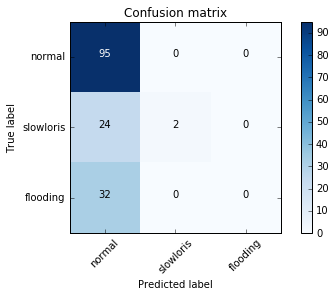

In [425]:
plot_confusion_matrix(cm)

In [426]:
print("Accuracy = {}%".format(accuracy * 100))

Accuracy = 63.3986928105%


In [427]:
minClass = min(train.loc[(train.Class == 1)].Class.count(), 
               train.loc[(train.Class == 2)].Class.count(), 
               train.loc[(train.Class == 3)].Class.count())

In [428]:
train1 = train.loc[(train.Class == 1)].sample(minClass)
train2 = train.loc[(train.Class == 2)].sample(minClass)
train3 = train.loc[(train.Class == 3)].sample(minClass)

In [429]:
balanced_train = pd.concat([train1, train2, train3])
print("Balanced training set length = {}".format(balanced_train.Class.count()))
print("Class 1 count = {}".format(balanced_train.loc[(train.Class == 1)].Class.count()))
print("Class 2 count = {}".format(balanced_train.loc[(train.Class == 2)].Class.count()))
print("Class 3 count = {}".format(balanced_train.loc[(train.Class == 3)].Class.count()))
balanced_in = balanced_train.drop(['Class'], axis=1)
balanced_out = balanced_train['Class']

Balanced training set length = 99
Class 1 count = 33
Class 2 count = 33
Class 3 count = 33


In [430]:
balanced_rf = RandomForestClassifier(n_estimators=4)
balanced_rf.fit(balanced_in, balanced_out)
balanced_predicted = balanced_rf.predict(test_in)
balanced_accuracy = balanced_rf.score(test_in, test_out)

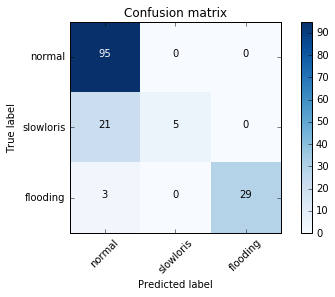

In [431]:
balanced_cm = confusion_matrix(test_out, balanced_predicted)
plt.figure()
plot_confusion_matrix(balanced_cm)

In [432]:
print("Accuracy = {}%".format(balanced_accuracy * 100))

Accuracy = 84.3137254902%
